In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.calibration import CalibratedClassifierCV
import joblib

In [17]:
df = pd.read_excel("C:/Users/home/Downloads/E_commerce.xlsx")

In [18]:
# Descriptive Statistics
numeric_cols = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

for col in numeric_cols:
    print(f"Column: {col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Standard Deviation: {df[col].std()}")
    print("-"*30)

Column: Age
Mean: 33.597142857142856
Median: 32.5
Standard Deviation: 4.870882183548377
------------------------------
Column: Total Spend
Mean: 845.3817142857142
Median: 775.2
Standard Deviation: 362.05869534746563
------------------------------
Column: Items Purchased
Mean: 12.6
Median: 12.0
Standard Deviation: 4.15598439647275
------------------------------
Column: Average Rating
Mean: 4.019142857142858
Median: 4.1
Standard Deviation: 0.580538587146968
------------------------------
Column: Days Since Last Purchase
Mean: 26.588571428571427
Median: 23.0
Standard Deviation: 13.440813085749616
------------------------------


In [14]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [20]:
from sklearn.preprocessing import LabelEncoder #handle catagorical veriable

label_cols = ['Gender', 'Membership Type', 'Satisfaction Level']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,29,New York,1,1120.20,14,4.6,True,25,1
1,102,1,34,Los Angeles,2,780.50,11,4.1,False,18,0
2,103,0,43,Chicago,0,510.75,9,3.4,True,42,2
3,104,1,30,San Francisco,1,1480.30,19,4.7,False,12,1
4,105,1,27,Miami,2,720.40,13,4.0,True,55,2


In [21]:
df = pd.get_dummies(df, columns=['City'], drop_first=True)  # onehotencoding fo city drop_first=True avoids dummy variable trap
df.head()

,Customer ID,Gender,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco
0,101,0,29,1,1120.20,14,4.6,True,25,1,False,False,False,True,False
1,102,1,34,2,780.50,11,4.1,False,18,0,False,True,False,False,False
2,103,0,43,0,510.75,9,3.4,True,42,2,False,False,False,False,False
3,104,1,30,1,1480.30,19,4.7,False,12,1,False,False,False,False,True
4,105,1,27,2,720.40,13,4.0,True,55,2,False,False,True,False,False


In [23]:
#feturescaling normilazation
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply Min-Max normalization
df[['Total Spend Normalized', 'Items Purchased Normalized']] = scaler.fit_transform(
    df[['Total Spend', 'Items Purchased']]
)

# Display a few rows to verify
df.head()

,Customer ID,Gender,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Total Spend Normalized,Items Purchased Normalized
0,101,0,29,1,1120.20,14,4.6,True,25,1,False,False,False,True,False,0.639502,0.500000
1,102,1,34,2,780.50,11,4.1,False,18,0,False,True,False,False,False,0.333273,0.285714
2,103,0,43,0,510.75,9,3.4,True,42,2,False,False,False,False,False,0.090102,0.142857
3,104,1,30,1,1480.30,19,4.7,False,12,1,False,False,False,False,True,0.964122,0.857143
4,105,1,27,2,720.40,13,4.0,True,55,2,False,False,True,False,False,0.279095,0.428571


In [24]:
scaler_std = StandardScaler() #standardization z scoring scaler
df[['Total Spend Standardized', 'Items Purchased Standardized']] = scaler_std.fit_transform(df[['Total Spend', 'Items Purchased']])


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   350 non-null    int64  
 1   Gender                        350 non-null    int64  
 2   Age                           350 non-null    int64  
 3   Membership Type               350 non-null    int64  
 4   Total Spend                   350 non-null    float64
 5   Items Purchased               350 non-null    int64  
 6   Average Rating                350 non-null    float64
 7   Discount Applied              350 non-null    bool   
 8   Days Since Last Purchase      350 non-null    int64  
 9   Satisfaction Level            350 non-null    int64  
 10  City_Houston                  350 non-null    bool   
 11  City_Los Angeles              350 non-null    bool   
 12  City_Miami                    350 non-null    bool   
 13  City_

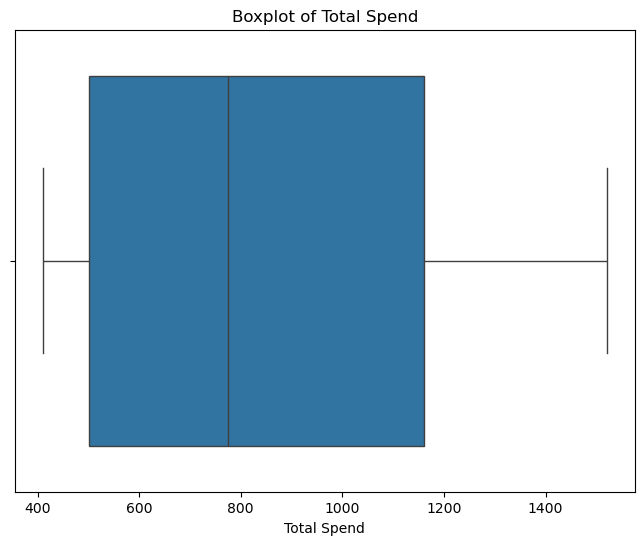

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Total Spend'])
plt.title('Boxplot of Total Spend')
plt.show()

In [29]:
Q1 = df['Total Spend'].quantile(0.25) # detect outlayer
Q3 = df['Total Spend'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Detect outliers
outliers = df[(df['Total Spend'] < lower_bound) | (df['Total Spend'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 0


In [30]:
# remove outlayer
df = df[(df['Total Spend'] >= lower_bound) & (df['Total Spend'] <= upper_bound)]

In [31]:
#treat
df['Total Spend'] = np.where(df['Total Spend'] > upper_bound, upper_bound,
                             np.where(df['Total Spend'] < lower_bound, lower_bound, df['Total Spend']))

In [32]:
df['Total Spend'] = np.where(df['Total Spend'] > upper_bound, upper_bound,
                             np.where(df['Total Spend'] < lower_bound, lower_bound, df['Total Spend']))

#Cap/Floor Outliers

In [33]:
from sklearn.model_selection import train_test_split   #Classification and Clustering Insights
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [34]:
# Map satisfaction levels (if not already encoded this way)
satisfaction_mapping = {'Unsatisfied': 0, 'Neutral': 1, 'Satisfied': 2}
df['Satisfaction Level'] = df['Satisfaction Level'].replace(satisfaction_mapping)

# Verify
df['Satisfaction Level'].value_counts()

Satisfaction Level
1    125
2    116
0    107
3      2
Name: count, dtype: int64

In [35]:
# Map satisfaction levels (if not already encoded this way)
satisfaction_mapping = {'Unsatisfied': 0, 'Neutral': 1, 'Satisfied': 2}
df['Satisfaction Level'] = df['Satisfaction Level'].replace(satisfaction_mapping)

# Verify
df['Satisfaction Level'].value_counts()
# Drop non-relevant ID columns if any
X = df.drop(['Satisfaction Level'], axis=1)
y = df['Satisfaction Level']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # Increase iteration limit
model.fit(X_train, y_train)

C:\Users\home\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9904761904761905

Confusion Matrix:
 [[41  0  0]
 [ 1 39  0]
 [ 0  0 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.97      0.99        40
           2       1.00      1.00      1.00        24

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105



In [39]:
#cluestering
numeric_features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_features])

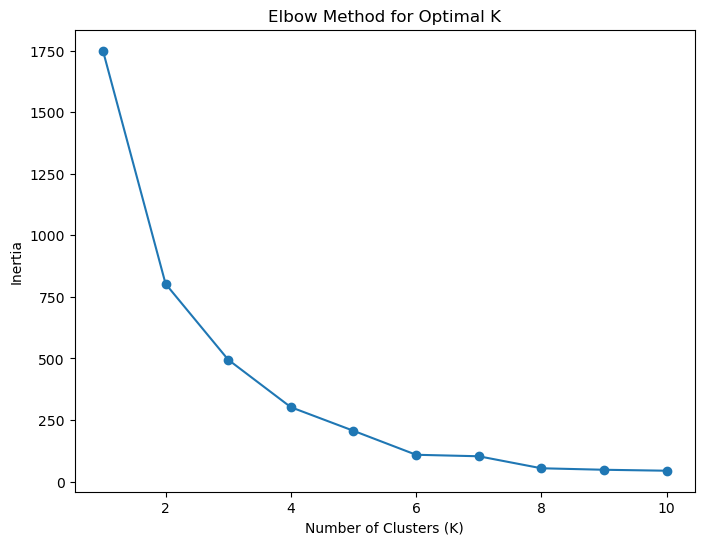

In [40]:
#elbow method
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_features])
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [41]:
#k-means cleaster
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

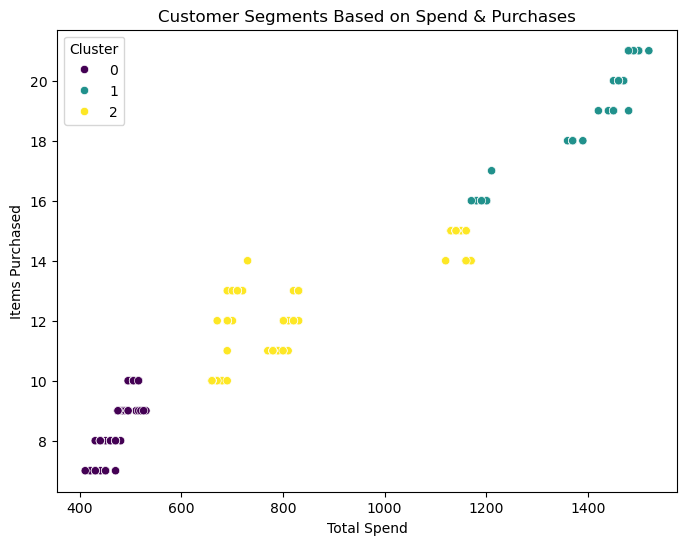

In [42]:
#cleaster sigmentation
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total Spend', y='Items Purchased', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments Based on Spend & Purchases')
plt.show()

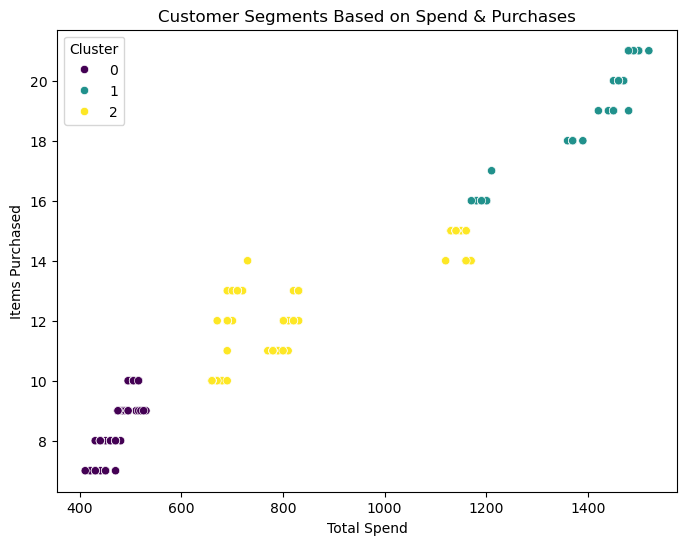

Top 5 Features Influencing Satisfaction:
Index(['Total Spend', 'Days Since Last Purchase', 'Total Spend Normalized',
       'Total Spend Standardized', 'Items Purchased Standardized'],
      dtype='object')


In [43]:
# anova
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total Spend', y='Items Purchased', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments Based on Spend & Purchases')
plt.show()
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)

# Get top features
selected_features = X.columns[selector.get_support()]
print("Top 5 Features Influencing Satisfaction:")
print(selected_features)

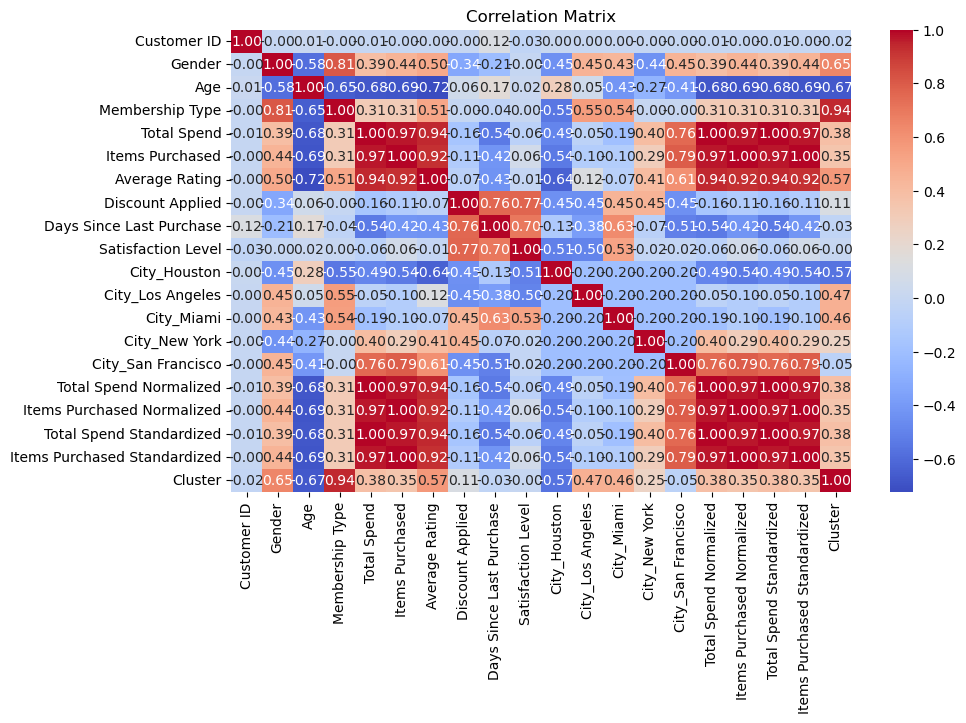

Satisfaction Level              1.000000
Discount Applied                0.771007
Days Since Last Purchase        0.698878
City_Miami                      0.528770
Items Purchased Standardized    0.063794
Items Purchased                 0.063794
Items Purchased Normalized      0.063794
Age                             0.016819
Membership Type                 0.004155
Cluster                        -0.001217
Gender                         -0.003521
Average Rating                 -0.012443
City_San Francisco             -0.020398
City_New York                  -0.020608
Customer ID                    -0.032005
Total Spend                    -0.060444
Total Spend Normalized         -0.060444
Total Spend Standardized       -0.060444
City_Los Angeles               -0.500209
City_Houston                   -0.512755
Name: Satisfaction Level, dtype: float64

In [44]:
# correlation matrix
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Focus on Satisfaction Level correlations
corr['Satisfaction Level'].sort_values(ascending=False)